# EDA and Statistical Analysis of Credit Card Dataset

###  Import the required libraries

In [1]:
# import pandas
import pandas as pd

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

from scipy.stats import binom

print("All libraries have been imported")

All libraries have been imported


## PART-A ( Concept Based)

In [3]:
# The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO

ages_CEO =[57,61,57,57,58,57,61,54,68,
           51,49,64,50,48,65,52,56,46,
           54,49,50,47,55,55,54,42,51,
           56,55,54,51,60,62,43,55,56,
           61,52,69,64,46,54]

## 1. Compute the mean, median and the mode of the data

In [4]:
# To find the average ,median and mode of the data using numpy and statisticals method

mean = np.mean(ages_CEO)
median = np.median(ages_CEO)
mode = stats.mode(ages_CEO)

print("Mean:", round(mean))
print("Median:", round(median))
print("Mode:", mode)

Mean: 55
Median: 55
Mode: ModeResult(mode=array([54]), count=array([5]))


## 2. Compute the range , variance and standard deviation of CEO ages

In [5]:
# To find the range,variance and standard deviation of CEO ages 

#  To find the Range using np.min() and np.max() method
range = np.max(ages_CEO) - np.min(ages_CEO)

# To find the Variance using np.var() method
variance = np.var(ages_CEO)

# To find the Standard deviation using np.std() method 
std_deviation = np.std(ages_CEO)

# Print the output
print("Range: ", range)
print("Variance: ", round(variance,5))
print("Standard deviation: ", round(std_deviation,5))

Range:  27
Variance:  38.51474
Standard deviation:  6.20602


## 3. Find the mean deviation for the data . The mean deviation is defined as below.

Mean Deviation =summation|X-X_bar| /  n

In [6]:
# To find the mean deviation using the formula : Mean Deviation =summation|X-X_bar| / n

def mean_deviation(ages_CEO):
    n = len(ages_CEO)
    mean = sum(ages_CEO) / n
    deviation = [abs(x - mean) for x in ages_CEO]
    return sum(deviation) / n

ages_CEO =[57,61,57,57,58,57,61,54,68,
           51,49,64,50,48,65,52,56,46,
           54,49,50,47,55,55,54,42,51,
           56,55,54,51,60,62,43,55,56,
           61,52,69,64,46,54]
print(" Mean deviation for the data : " ,round(mean_deviation(ages_CEO),3))

 Mean deviation for the data :  4.814


## 4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [8]:
# To find the Pearson coefficient of skewness using skew() function
ages_CEO=pd.DataFrame(ages_CEO)
skewness=ages_CEO.skew()
print('Pearson coefficient of skewness : ',skewness)

Pearson coefficient of skewness :  0    0.19306
dtype: float64


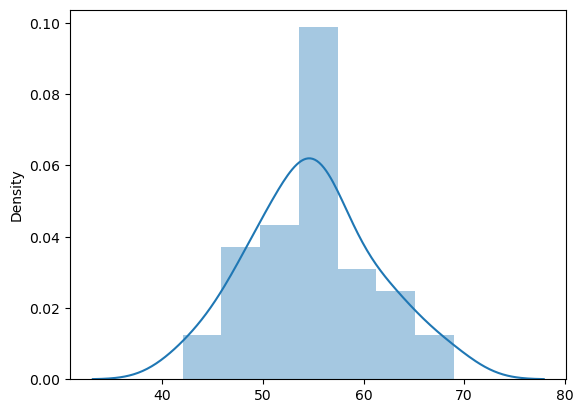

In [9]:
# The value of the coefficient if skewness usually ranges from –3 to 3

sns.distplot(ages_CEO)
plt.show()

###  Observation: The distribution is positively skewed ,The coefficient is positive

## Q5. Count the number of data values that fall within two standard deviations of the mean.  Compare this with the answer from Chebyshev’s Theorem.

In [9]:
# To Count the number of data values that fall within two standard deviations of the mean.

# This code creates an array of data values and calculates the mean and standard deviation using NumPy.
ages_CEO =np.array([57,61,57,57,58,57,61,54,68,
           51,49,64,50,48,65,52,56,46,
           54,49,50,47,55,55,54,42,51,
           56,55,54,51,60,62,43,55,56,
           61,52,69,64,46,54])
mean = np.mean(ages_CEO)
std_dev = np.std(ages_CEO)
## It then calculates the lower and upper bounds for two standard deviations from the mean.
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev
## Finally, it counts the number of data values that fall within this range.
count = len(ages_CEO[(ages_CEO > lower_bound) & (ages_CEO < upper_bound)])
# To print the output
print("The number of data values that fall within two standard deviations of the mean count is",count)

The number of data values that fall within two standard deviations of the mean count is 39


### Observation:    Chebyshev’s Theorem states that at least 89% of the observations fall inside that range,and no more than 11% fall outside that range.

## 6. Find the three quartiles and the interquartile range (IQR).

In [10]:
# To find the three quartiles
Q1 = np.percentile(ages_CEO, 25)
Q2 = np.percentile(ages_CEO, 50)
Q3 = np.percentile(ages_CEO, 75)

# To calculate the interquartile range
IQR = Q3 - Q1

# Print the output
print("First Quartile (Q1):", round(Q1))
print("Second Quartile (Q2):", round(Q2))
print("Third Quartile (Q3):", round(Q3))
print("Interquartile Range (IQR):", IQR)

First Quartile (Q1): 51
Second Quartile (Q2): 55
Third Quartile (Q3): 58
Interquartile Range (IQR): 6.75


## 7. Are there any outliers in the dataset ?

In [12]:
# Calculate the interquartile range
IQR = Q3 - Q1

# Find the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = ages_CEO[(ages_CEO < lower_bound) | (ages_CEO > upper_bound)]
print(" Outliers : " , outliers)

 Outliers :  [68 69]


### Observation : Yes ,There are two outliers in the dataset.

## 8. Draw a boxplot of the dataset to confirm.

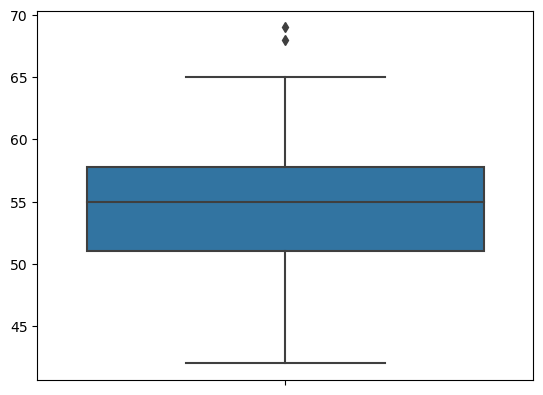

In [13]:
# To plot the graph using boxplot
sns.boxplot(y=ages_CEO)
plt.show()

## Q9. Find the percentile rank of the datapoint 50.

In [14]:
# Use the numpy.percentile function to find the percentile rank of 50
percentile_rank = np.percentile(ages_CEO, 50)

# Print the result
print("The percentile rank of 50 in the given dataset is", round(percentile_rank))

The percentile rank of 50 in the given dataset is 55


### This means that 50% of the data points in the dataset are below or equal to 55. 


## Q10. What is the probability that a person becoming a CEO is below 50 years of age ?

In [11]:
# Count the number of data points below 50
below_50 = np.sum(ages_CEO < 50)

# Count the total number of data points
total = len(ages_CEO)

# Calculate the probability as the ratio of below_50 to total
probability = below_50 / total

# Print the result
print("The probability that a person becoming a CEO is below 50 years of age is", round(probability,5))

The probability that a person becoming a CEO is below 50 years of age is 0.19048


## 11. Create a frequency distribution for the data and visualize it appropriately

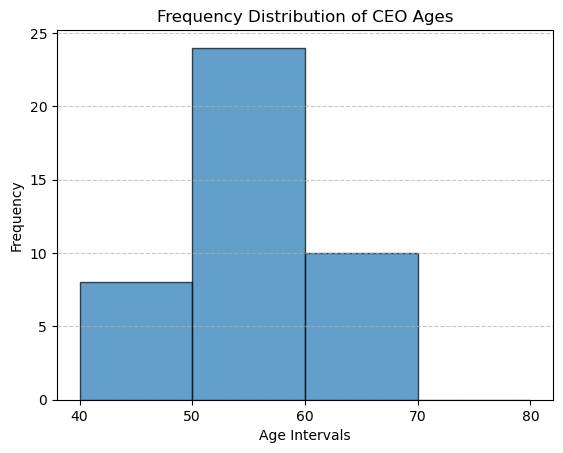

In [12]:
# Specify the number of bins as 5

bins=[40,50,60,70,80]

# Create a frequency distribution using numpy.hist() function
plt.hist(ages_CEO, bins=bins ,edgecolor='k' ,alpha=0.7)

# Add labels and title to the plot
plt.xlabel("Age Intervals")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of CEO Ages")
plt.xticks(bins)
plt.grid(axis='y' ,linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Observation:
- 1.This histogram displays the frequency distribution of CEO ages. The x-axis represents the age intervals and the y-axis represents the frequency or count of CEOs within each age range.
- 2.We can observe that most CEOs took over their positions in their late forties or early fifties.
- 3.There is a relatively small number of CEOs who took over their positions in their sixties or late sixties.
- 4.The distribution appears to be slightly right-skewed.

## 12. Create a probability distribution of the data and visualize it appropriately.

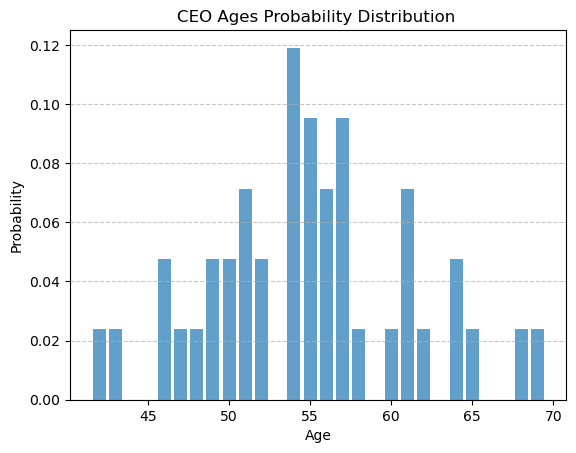

In [17]:
# Calculate unique values and their corresponding probabilities
unique_ages,age_counts=np.unique(ages_CEO ,return_counts=True)
total_CEOs =len(ages_CEO)

# Dividing the count of age by the total number of CEO's
probabilities = age_counts / total_CEOs

# Create a bar plot for the probability distribution
plt.bar(unique_ages,probabilities,align='center',alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("CEO Ages Probability Distribution ")
plt.grid(axis='y',linestyle='--' , alpha=0.7)
plt.show()

### 13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100  random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers.Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. 
State your observations.Does it corroborate the Central Limit Theorem?


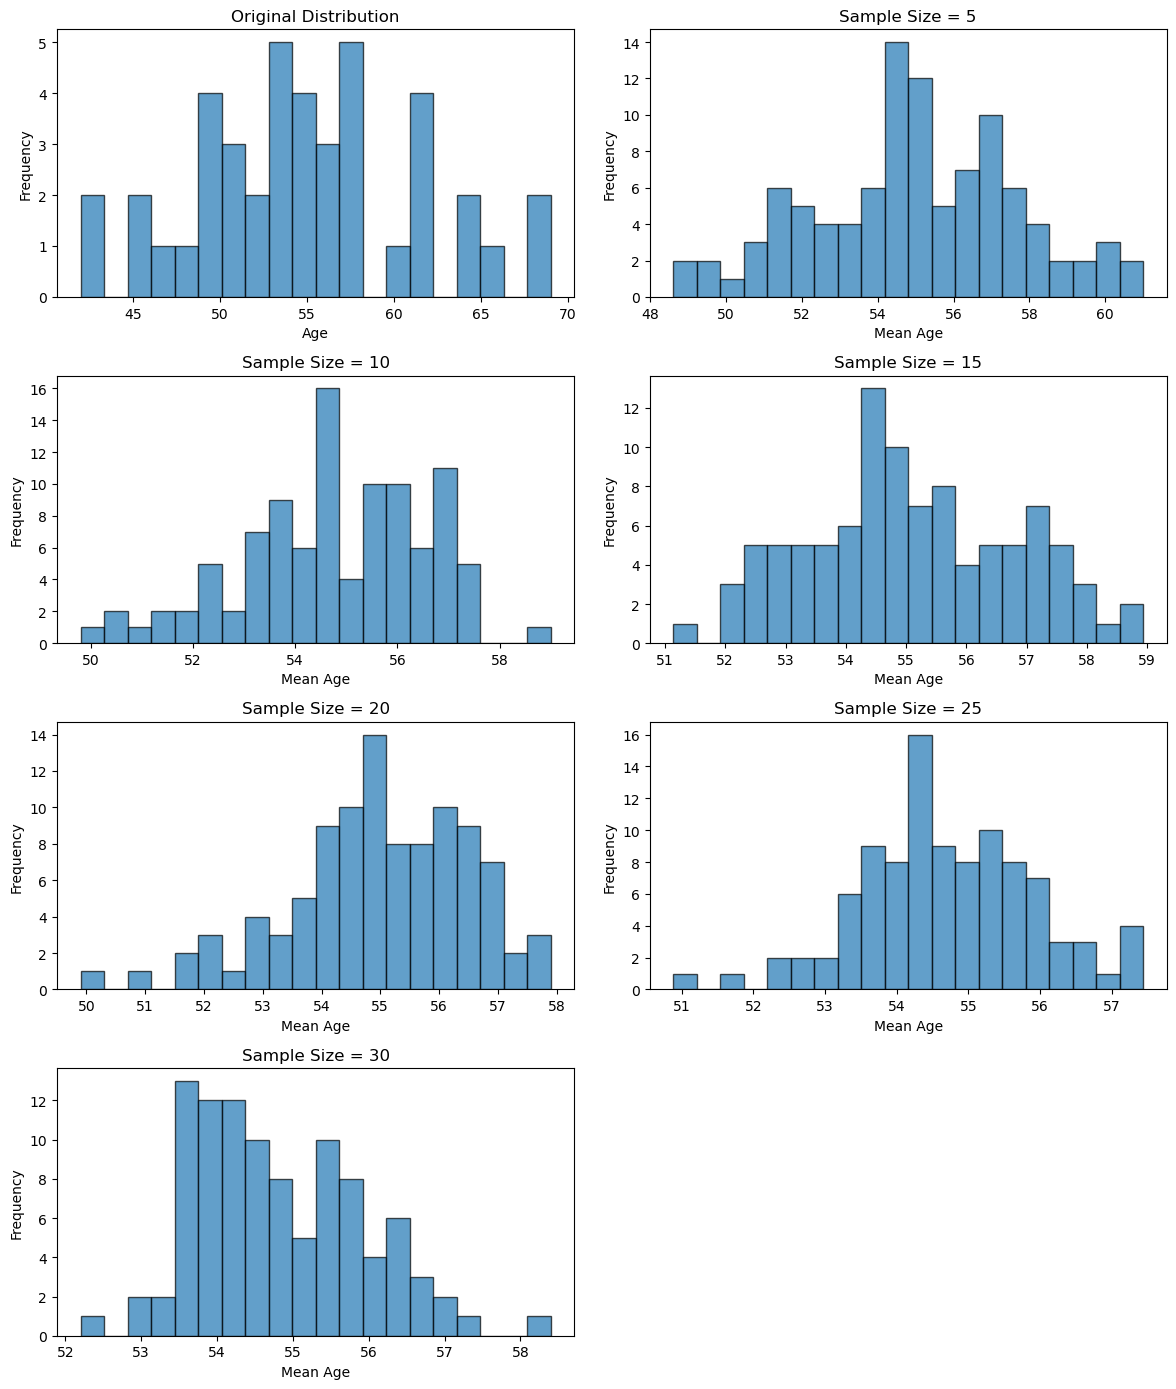

In [18]:
# Sample sizes to consider
sample_sizes = [5, 10, 15, 20, 25, 30]

# Create subplots to visualize the original distribution and sampling distributions
plt.figure(figsize=(12, 14))

# Plot the original distribution
plt.subplot(4, 2, 1)
plt.hist(ages_CEO, bins=20, edgecolor='k', alpha=0.7)
plt.title('Original Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Generate sampling distribution means for different sample sizes
sampling_distribution_means = []
for i, sample_size in enumerate(sample_sizes):
    means = np.mean(np.random.choice(ages_CEO, size=(100, sample_size), replace=True), axis=1)
    sampling_distribution_means.append(means)

# Plot the sampling distributions
for i, sample_size in enumerate(sample_sizes):
    plt.subplot(4, 2, i + 2)
    plt.hist(sampling_distribution_means[i], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Sample Size = {sample_size}')
    plt.xlabel('Mean Age')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### The code above creates a histogram to visualize the original distribution of ages in the dataset. It then generates 100 random samples with replacement from this dataset for each of the specified sample sizes (5, 10, 15, 20, 25, and 30). 
### For each sample, it calculates the mean age and stores it in a list.Finally, it plots the sampling distributions of the mean age for each sample size.

### Q14. Treat this dataset as a binomial distribution where p is the probability that a person becomes a CEO above 50 years age. What is the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6 are above 50 years of age?

In [13]:
# Count how many CEOs are above 50
above_50 = np.sum(ages_CEO > 50)
# Divide by the total number of CEOs
p = above_50 / len(ages_CEO)
print(round(p,3))

0.762


In [14]:
# Calculate the binomial probability
probability = binom.pmf(k=6, n=10, p=0.762)
print("Probability that exactly 6 are above 50 years of age is:",round(probability,3))

Probability that exactly 6 are above 50 years of age is: 0.132


### So the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6 are above 50 years of age is about 0.132

## 15. A study claims that 25% of all Fortune 500 companies becoming a CEO are above 60 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [15]:
# Define the variables
n = 300 # number of trials
p = 0.25 # probability of success in each trial
q = 1 - p # probability of failure in each trial
X = 75 # number of successes in n trials
mean = n * p # mean of X
std = (n * p * q) ** 0.5 # standard deviation of X

# Use the correction for continuity and the normal distribution functions
lower = (X - 0.5 - mean) / std # lower bound of Z
upper = (X + 0.5 - mean) / std # upper bound of Z
prob = stats.norm.cdf(upper) - stats.norm.cdf(lower) # probability of X being exactly 75

# Print the result
print("The probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age is", 
      round(prob, 4))

The probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age is 0.0532


## 16. Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [21]:
ages_CEO =[57,61,57,57,58,57,61,54,68,
           51,49,64,50,48,65,52,56,46,
           54,49,50,47,55,55,54,42,51,
           56,55,54,51,60,62,43,55,56,
           61,52,69,64,46,54]

### The sample size is greater than 30 and the population standard deviation is unknown, we can use a t-distribution 

In [16]:
# Calculate sample mean and standard deviation
x_bar = np.mean(ages_CEO)
s = np.std(ages_CEO)
n= len(ages_CEO)
# Calculate critical value for t-distribution
t_crit = stats.t.ppf(q=0.95, df=n-1)

# Calculate margin of error
moe = t_crit * s / np.sqrt(n)

# Calculate confidence interval
ci = (x_bar - moe , x_bar + moe)

# Print the output
print(f"The true mean age of the population of CEOs is between {ci[0]:.2f} and {ci[1]:.2f} with a confidence level of {0.95:.0%}.")

The true mean age of the population of CEOs is between 53.29 and 56.52 with a confidence level of 95%.


## 17. A data scientist wants to estimate with 95% confidence the proportion of CEOs of Fortune 500 companies are above 60 years in the population.
Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [21]:
import math

# Define the desired margin of error and confidence level
E = 0.02
alpha = 0.05

# Estimate the proportion of CEOs above 60 based on the recent study
p_hat = 0.25

# Calculate the critical value for a normal distribution
z_alpha_over_2 = abs(stats.norm.ppf(alpha/2))

# Calculate the minimum sample size
n = math.ceil((z_alpha_over_2 / E)**2 * p_hat * (1 - p_hat))

print(f"The minimum sample size required is {n}.")

The minimum sample size required is 1801.


## 18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.


In [18]:
# To calculate the minimum sample size

from scipy.stats import norm
# Set the desired confidence level and margin of error
confidence_level=0.90
margin_of_error=0.05

# Calculate the critical value(z-score) corresponding to the confidence level
critical_value =norm.ppf((1+confidence_level)/2)

# Calculate the minimum sample size
minimum_sample_size = round((critical_value/margin_of_error)**2,0)

print("The minimum sample size necessary is :" , minimum_sample_size)

The minimum sample size necessary is : 1082.0


## Q19. A researcher claims that currently 25% of all CEOS are above 60 years . Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only 10 are above 60 years.

In [19]:
# Null hypothesis (H0)        : The proportion of CEO above 60 years is 25%
# Alternateive hypothesis(H1) : The proportion of CEO above 60 years is not 25%

# We can use the binomial test function from scipy.stats module

from scipy.stats import binom_test

sample_size =30
observed_successes = 10
expected_proportion =0.25
alpha=0.05

# Perform the hypothesis test

p_value= binom_test(observed_successes,n=sample_size,p=expected_proportion,alternative='two-sided')

# Compare the p_value with the significance level (alpha)

if p_value <alpha:
    conclusion='Reject the null hypothesis'
else:
    conclusion ='Reject the alternative hypothesis'
    
print("The p_value is " , p_value ,"based on this , We",conclusion)

The p_value is  0.294462962615145 based on this , We Reject the alternative hypothesis


### 20. Assume you are a data scientist for the Fortune 500 companies. You are asked to research the question whether the CEO ages of UK are on average older than the CEO ages of Americans. you take a random sample of 40 CEO ages from America and UK and the data is as follows:

In [26]:
UK = [47, 49, 73, 50, 65, 70, 49, 47, 40, 43,
      46, 35, 38, 40, 47, 39, 49, 37, 37, 36,
      40, 37, 31, 48, 48, 45, 52, 38, 38, 36,
      44, 40, 48, 45, 45, 36, 39, 44, 52, 47]
USA = [47, 57, 52, 47, 48, 56, 56, 52, 50, 40,
       46, 43, 44, 51, 36, 42, 49, 49, 40, 43,
       39, 39, 22, 41, 45, 46, 39, 32, 36, 32,
       32, 32, 37, 33, 44, 49, 44, 44, 49, 32]

## a. What are your hypotheses?

In [ ]:
The hypothesis for comparing the average CEO age of the UK is equal to the average CEO age of the USA

** Null hypothesis (H0)        : The average CEO age of UK is equal to the average CEO age of USA.
** Alternative hypothesis (H1) : The average CEO age of UK is greater than the average CEO age of USA.  

## b. What significance level will you use?

### Answer: The significance level also known as alpha, determines the threshold for accepting or rejecting the null hypothesis.
### A significance level of 0.05 will be used which means to accept a 5% chance of making a Type I error (rejecting the null hypothesis when it's true)

## c. What statistical test will you use?

###  Answer: A two-sample t-test will be used to compare the means of two independent groups.

### d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

In [20]:
sample_size1 = 40
sample_size2 = 40
sample_mean1 = 44.75
sample_mean2 = 42.875
sample_std_deviation1  = 8.8
sample_std_deviation2  = 7.8

# Calculate the t-test statistic and p-value

import scipy.stats as stats

t_stat,p_value=stats.ttest_ind_from_stats(sample_mean1,sample_std_deviation1,sample_size1,sample_mean2,sample_std_deviation2,
                                         sample_size2)
print('t_stats :', t_stat ,'p_value :',p_value)
# Print the test result

if p_value<0.5:
    print(" Average CEO age of UK is significantly older than the average CEO age of US")
else:
    print(" There is no significant difference in the average CEO ages between the UK and the USA")

t_stats : 1.0084435261263631 p_value : 0.3163597537418728
 Average CEO age of UK is significantly older than the average CEO age of US


## e. What is your decision?

### We fail to reject the null hypothesis.

## f. What can you conclude?

###  Answer:Based on our test results and decision,we do not have sufficient evidence to conclude that the average CEO age of UK is greater than that of USA.

## g. Do you feel that using the data given really answers the original question asked?

### Answer:The data given may not be sufficient to answer the original question since it only provides a small sample size from each country



## h. What other data might be used to answer the question?

### To answer this question  more comprehensively,additional data that could be used includes CEO ages from a larger and more diverse sample of companies in both the UK and the USA. 
### Additionally ,demographic information ,such as the distribution of CEO ages across industries,could provide further context for the comparision.